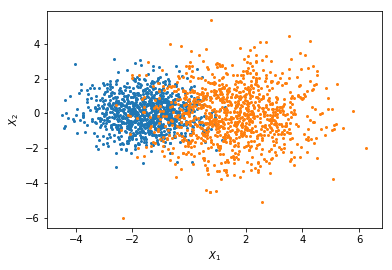

In [18]:
import scipy.stats as ss 
import matplotlib.pyplot as plt 
import numpy as np
n = 50
h = 1
sd = 1
def gen_data(n, h, sd1, sd2): 
   x1 = ss.norm.rvs(-h, sd1, n) 
   y1 = ss.norm.rvs(0, sd1, n) 
   x2 = ss.norm.rvs(h, sd2, n) 
   y2 = ss.norm.rvs(0, sd2, n) 
   return (x1, y1, x2, y2) 

def plot_data(x1, y1, x2, y2): 
   plt.figure() 
   plt.plot(x1, y1, "o", ms=2) 
   plt.plot(x2, y2, "o", ms=2) 
   plt.xlabel("$X_1$") 
   plt.ylabel("$X_2$")
   plt.show()
   
x1,y1,x2,y2 = gen_data(1000, 1.5, 1, 1.5)
plot_data(x1, y1, x2, y2)

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
clf = LogisticRegression()

In [29]:
X = np.vstack((np.vstack((x1,y1)).T, np.vstack((x2,y2)).T))

In [30]:
n= 1000
y= np.hstack((np.repeat(1,n),np.repeat(2,n)))

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size=0.5,random_state=1)

C:\Users\noura\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [37]:
clf.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
clf.score(xtest,ytest)

0.897

In [39]:
clf.predict_proba(np.array([-2,0]).reshape(1,-1))

array([[0.9710232, 0.0289768]])

In [40]:
clf.predict(np.array([-2,0]).reshape(1,-1))

array([1])

In [41]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

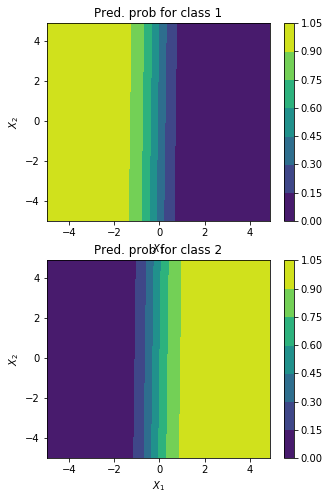

In [42]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");